# D&D 5e Monsters Analysis

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [45]:
monsters = pd.read_csv('srd_monsters.csv')
monsters.describe()

,Unnamed: 0,hit_points,strength,dexterity,constitution,intelligence,wisdom,charisma,challenge_rating,xp
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,166.500000,81.862275,15.191617,12.655689,15.089820,7.889222,11.697605,9.736527,4.556512,4148.488024
std,96.561725,98.034952,6.639525,3.195062,4.440229,5.663990,2.897891,5.727237,5.817831,12146.540995
min,0.000000,1.000000,1.000000,1.000000,8.000000,1.000000,3.000000,1.000000,0.000000,0.000000
25%,83.250000,19.000000,11.000000,10.000000,12.000000,2.000000,10.000000,5.000000,0.500000,100.000000
50%,166.500000,45.000000,16.000000,13.000000,14.000000,7.000000,12.000000,8.000000,2.000000,450.000000
75%,249.750000,117.750000,19.000000,15.000000,17.750000,12.000000,13.000000,14.000000,6.000000,2300.000000
max,333.000000,676.000000,30.000000,28.000000,30.000000,25.000000,25.000000,30.000000,30.000000,155000.000000


In [46]:
monsters

,Unnamed: 0,index,name,size,type,alignment,armor_class,hit_points,hit_dice,hit_points_roll,...,special_abilities,actions,legendary_actions,image,url,desc,subtype,reactions,images,forms
0,0,aboleth,Aboleth,Large,aberration,lawful evil,"[{'type': 'natural', 'value': 17}]",135,18d10,18d10+36,...,"[{'name': 'Amphibious', 'desc': 'The aboleth c...","[{'name': 'Multiattack', 'multiattack_type': '...","[{'name': 'Detect', 'desc': 'The aboleth makes...",/api/images/monsters/aboleth.png,/api/monsters/aboleth,NaN,NaN,NaN,NaN,NaN
1,1,acolyte,Acolyte,Medium,humanoid,any alignment,"[{'type': 'dex', 'value': 10}]",9,2d8,2d8,...,"[{'name': 'Spellcasting', 'desc': 'The acolyte...","[{'name': 'Club', 'desc': 'Melee Weapon Attack...",[],/api/images/monsters/acolyte.png,/api/monsters/acolyte,"Acolytes are junior members of a clergy, usual...",any race,NaN,NaN,NaN
2,2,adult-black-dragon,Adult Black Dragon,Huge,dragon,chaotic evil,"[{'type': 'natural', 'value': 19}]",195,17d12,17d12+85,...,"[{'name': 'Amphibious', 'desc': 'The dragon ca...","[{'name': 'Multiattack', 'multiattack_type': '...","[{'name': 'Detect', 'desc': 'The dragon makes ...",/api/images/monsters/adult-black-dragon.png,/api/monsters/adult-black-dragon,NaN,NaN,NaN,NaN,NaN
3,3,adult-blue-dragon,Adult Blue Dragon,Huge,dragon,lawful evil,"[{'type': 'natural', 'value': 19}]",225,18d12,18d12+108,...,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'multiattack_type': '...","[{'name': 'Detect', 'desc': 'The dragon makes ...",NaN,/api/monsters/adult-blue-dragon,NaN,NaN,NaN,NaN,NaN
4,4,adult-brass-dragon,Adult Brass Dragon,Huge,dragon,chaotic good,"[{'type': 'natural', 'value': 18}]",172,15d12,15d12+75,...,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'multiattack_type': '...","[{'name': 'Detect', 'desc': 'The dragon makes ...",NaN,/api/monsters/adult-brass-dragon,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,329,young-green-dragon,Young Green Dragon,Large,dragon,lawful evil,"[{'type': 'natural', 'value': 18}]",136,16d10,16d10+48,...,"[{'name': 'Amphibious', 'desc': 'The dragon ca...","[{'name': 'Multiattack', 'multiattack_type': '...",[],NaN,/api/monsters/young-green-dragon,NaN,NaN,NaN,NaN,NaN
330,330,young-red-dragon,Young Red Dragon,Large,dragon,chaotic evil,"[{'type': 'natural', 'value': 18}]",178,17d10,17d10+85,...,[],"[{'name': 'Multiattack', 'multiattack_type': '...",[],NaN,/api/monsters/young-red-dragon,NaN,NaN,NaN,NaN,NaN
331,331,young-silver-dragon,Young Silver Dragon,Large,dragon,lawful good,"[{'type': 'natural', 'value': 18}]",168,16d10,16d10+80,...,[],"[{'name': 'Multiattack', 'multiattack_type': '...",[],NaN,/api/monsters/young-silver-dragon,NaN,NaN,NaN,NaN,NaN
332,332,young-white-dragon,Young White Dragon,Large,dragon,chaotic evil,"[{'type': 'natural', 'value': 17}]",133,14d10,14d10+56,...,"[{'name': 'Ice Walk', 'desc': ""The dragon can ...","[{'name': 'Multiattack', 'multiattack_type': '...",[],NaN,/api/monsters/young-white-dragon,NaN,NaN,NaN,NaN,NaN


In [83]:
monsters.dtypes

Unnamed: 0                  int64
index                      object
name                       object
size                       object
type                       object
alignment                  object
armor_class                object
hit_points                  int64
hit_dice                   object
hit_points_roll            object
speed                      object
strength                    int64
dexterity                   int64
constitution                int64
intelligence                int64
wisdom                      int64
charisma                    int64
proficiencies              object
damage_vulnerabilities     object
damage_resistances         object
damage_immunities          object
condition_immunities       object
senses                     object
languages                  object
challenge_rating          float64
xp                          int64
special_abilities          object
actions                    object
legendary_actions          object
image         

In [92]:
monsters['ac'] = monsters['armor_class'].map(lambda ac: ast.literal_eval(ac)[0]['value'])
monsters['ac'].value_counts()

12    68
13    47
11    36
17    30
15    26
14    25
18    23
10    18
16    17
19    16
22     6
20     5
9      4
8      4
21     3
7      2
5      2
6      1
25     1
Name: ac, dtype: int64

In [93]:
mean_stats_by_cr = monsters.groupby(['challenge_rating']).mean().sort_values(['challenge_rating'])
mean_stats_by_cr

/tmp/ipykernel_97189/1340758760.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_stats_by_cr = monsters.groupby(['challenge_rating']).mean().sort_values(['challenge_rating'])


,Unnamed: 0,hit_points,strength,dexterity,constitution,intelligence,wisdom,charisma,xp,ac
challenge_rating,,,,,,,,,,
0.000,159.482759,3.413793,4.793103,12.275862,9.896552,2.655172,10.413793,4.482759,9.310345,11.068966
0.125,155.526316,8.473684,9.894737,13.368421,11.368421,5.000000,10.578947,7.000000,25.000000,12.421053
0.250,161.156250,14.968750,11.000000,12.781250,11.625000,4.593750,10.187500,6.062500,48.437500,11.781250
0.500,189.787879,20.424242,11.212121,12.454545,12.242424,5.030303,10.242424,6.575758,98.484848,12.363636
1.000,138.360000,28.080000,13.520000,13.680000,12.680000,6.120000,11.080000,8.560000,196.000000,12.880000
2.000,166.697674,46.395349,15.348837,12.372093,14.186047,6.860465,10.906977,8.209302,445.348837,12.883721
3.000,192.909091,59.181818,16.454545,12.681818,14.863636,8.045455,11.545455,10.363636,700.000000,13.954545
4.000,199.933333,87.533333,16.400000,12.000000,15.400000,9.600000,12.000000,10.866667,1100.000000,12.666667
5.000,199.925926,102.000000,17.666667,12.111111,17.407407,7.555556,11.407407,9.148148,1800.000000,14.555556


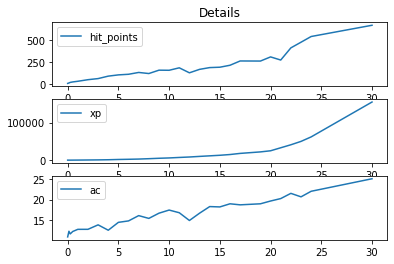

In [95]:
plt.subplot(3, 1, 1)
plt.title('Details')
plt.plot(mean_stats_by_cr.index, mean_stats_by_cr['hit_points'], label='hit_points')
plt.legend(loc="upper left")

plt.subplot(3, 1, 2)
plt.plot(mean_stats_by_cr.index, mean_stats_by_cr['xp'], label='xp')
plt.legend(loc="upper left")

plt.subplot(3, 1, 3)
plt.plot(mean_stats_by_cr.index, mean_stats_by_cr['ac'], label='ac')
plt.legend(loc="upper left")

plt.show()

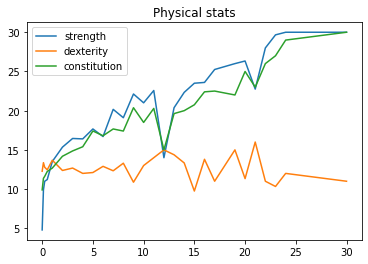

In [ ]:
plt.plot(mean_stats_by_cr.index, mean_stats_by_cr['strength'], label='strength')
plt.plot(mean_stats_by_cr.index, mean_stats_by_cr['dexterity'], label='dexterity')
plt.plot(mean_stats_by_cr.index, mean_stats_by_cr['constitution'], label='constitution')
plt.legend(loc="upper left")
plt.title('Physical stats')
plt.show()

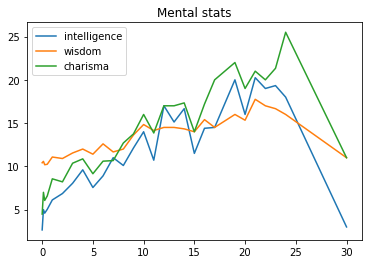

In [ ]:
plt.plot(mean_stats_by_cr.index, mean_stats_by_cr['intelligence'], label='intelligence')
plt.plot(mean_stats_by_cr.index, mean_stats_by_cr['wisdom'], label='wisdom')
plt.plot(mean_stats_by_cr.index, mean_stats_by_cr['charisma'], label='charisma')
plt.legend(loc="upper left")
plt.title('Mental stats')
plt.show()